In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

from IPython.core.pylabtools import figsize

import pymc3 as pm


# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

%config InlineBackend.figure_format = 'retina'


WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = pd.read_csv('TEST_TS_ECOPETROL.csv',sep=';')

In [3]:
ts_values = data['VALUE']

In [4]:
ts_values.shape

(31,)

<AxesSubplot: ylabel='VALUE'>

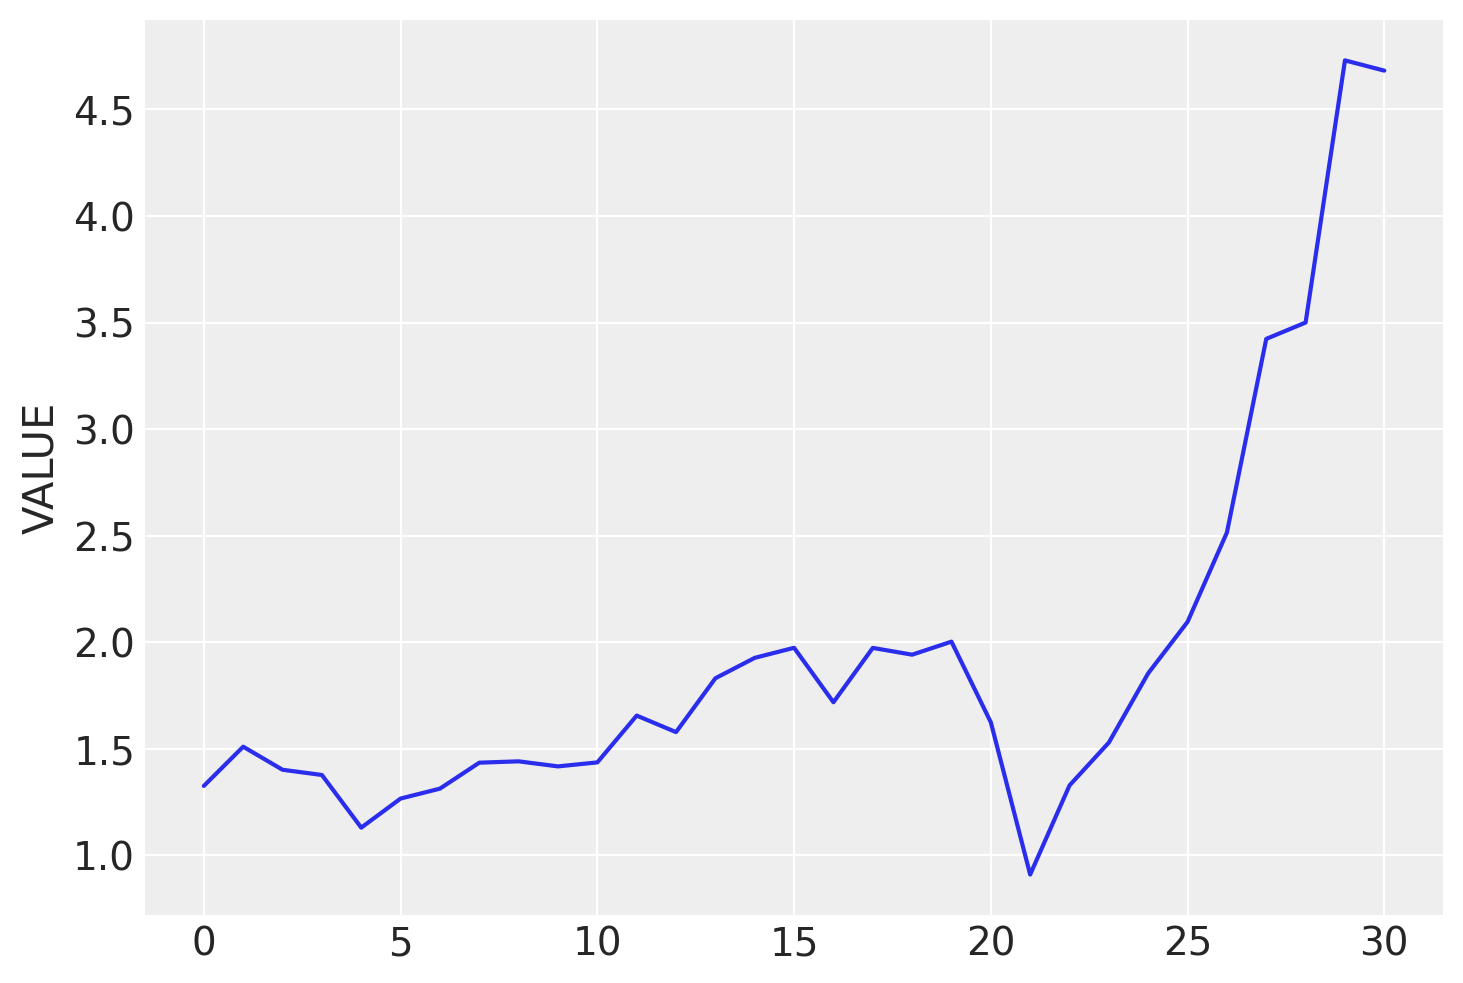

In [5]:
sns.lineplot(ts_values/(ts_values.mean()-ts_values.std()))

<AxesSubplot: xlabel='VALUE', ylabel='Count'>

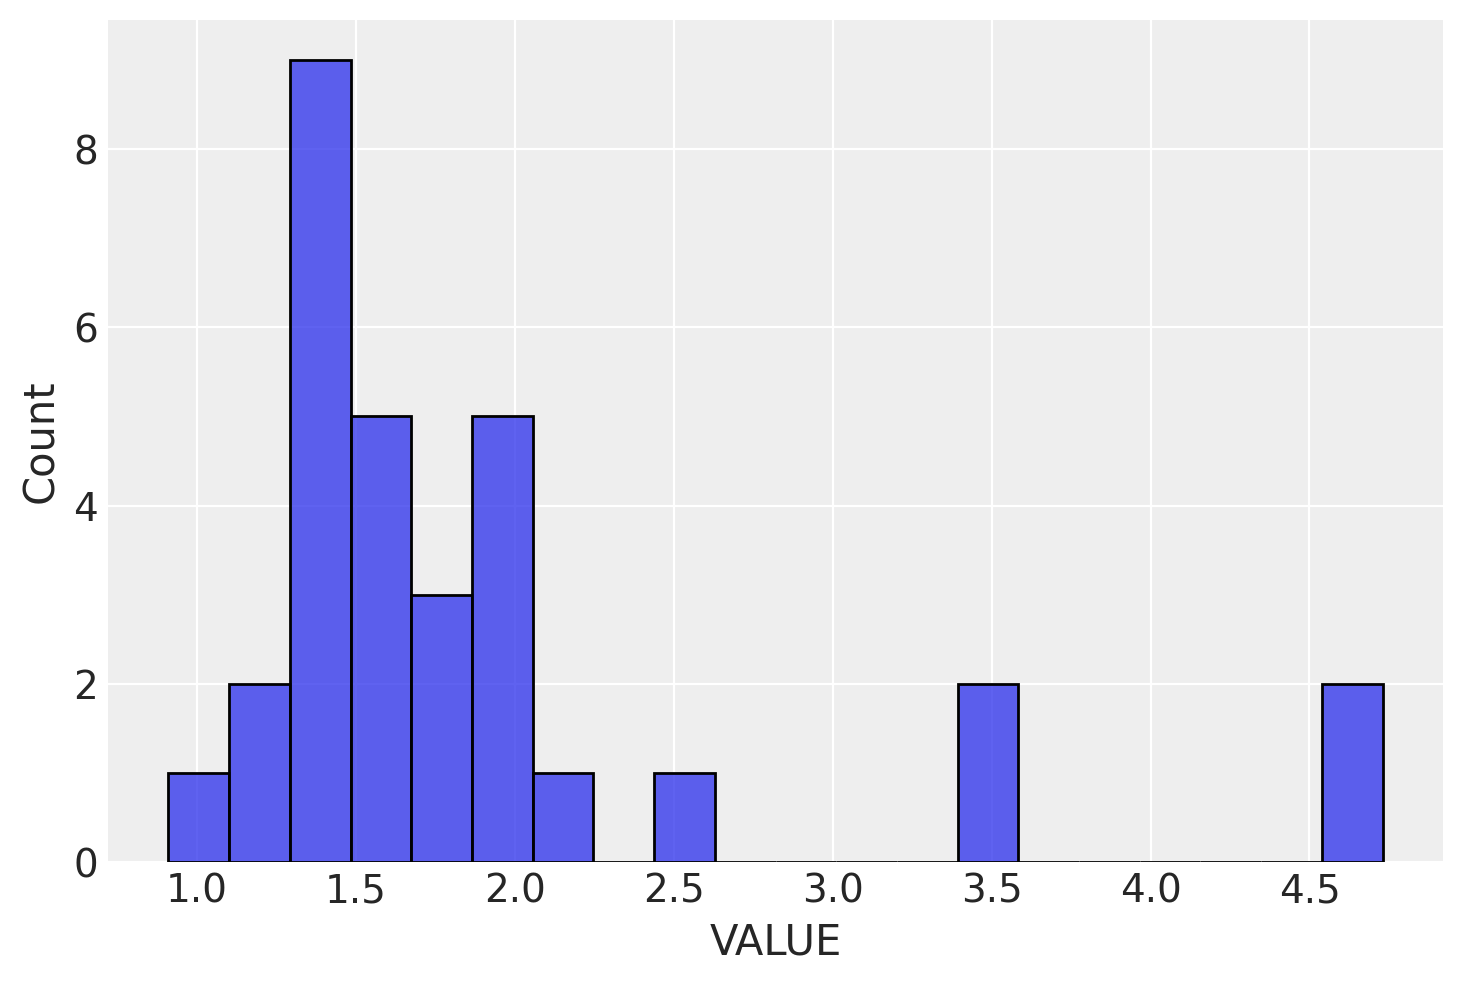

In [6]:
sns.histplot(ts_values/(ts_values.mean()-ts_values.std()),bins=20)

# Frequentsit - Distfit

In [7]:
! pip install distfit

In [13]:
from distfit import distfit

In [24]:
dist = distfit(distr='full')

In [25]:
dist.fit_transform(ts_values)

[distfit] >fit..
[distfit] >transform..
[distfit] >[alpha          ] [0.04 sec] [RSS: 8.40695e-08] [loc=525.401 scale=45428.343]
[distfit] >[anglit         ] [0.01 sec] [RSS: 9.31858e-08] [loc=15678.249 scale=10376.173]
[distfit] >[arcsine        ] [0.01 sec] [RSS: 1.41923e-07] [loc=6378.719 scale=37506.281]
[distfit] >[beta           ] [0.02 sec] [RSS: 1.38855e-07] [loc=6826.614 scale=37058.386]
[distfit] >[betaprime      ] [0.04 sec] [RSS: 9.18949e-08] [loc=-1.689 scale=130.834]
[distfit] >[bradford       ] [0.02 sec] [RSS: 1.21525e-07] [loc=8441.445 scale=35443.555]
[distfit] >[burr           ] [0.04 sec] [RSS: 8.52447e-08] [loc=-17.160 scale=1600.241]
[distfit] >[cauchy         ] [0.00 sec] [RSS: 8.96385e-08] [loc=14431.785 scale=2453.913]
[distfit] >[chi            ] [0.04 sec] [RSS: 1.11211e-07] [loc=8442.000 scale=12707.914]
[distfit] >[chi2           ] [0.03 sec] [RSS: 1.80167e-07] [loc=8442.000 scale=3.021]
[distfit] >[cosine         ] [0.00 sec] [RSS: 1.33705e-07] [loc=20621.

{'model': {'distr': <scipy.stats._continuous_distns.johnsonsu_gen at 0x25c7e6b1970>,
  'stats': 'RSS',
  'params': (-1.000765216771925,
   0.7551655907241579,
   12350.86952194411,
   1448.9489393753508),
  'name': 'johnsonsu',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x25c05d32880>,
  'score': 7.034619825889005e-08,
  'loc': 12350.86952194411,
  'scale': 1448.9489393753508,
  'arg': (-1.000765216771925, 0.7551655907241579),
  'CII_min_alpha': 10959.666529241662,
  'CII_max_alpha': 36401.17276535947},
 'summary':            distr                                              score  LLE  \
 0      johnsonsu                                                0.0  NaN   
 1        gennorm                                                0.0  NaN   
 2          alpha                                                0.0  NaN   
 3           fisk                                                0.0  NaN   
 4      exponnorm                                                0.0  NaN   
 .

In [27]:
dist.summary

,distr,score,LLE,loc,scale,arg
0,johnsonsu,0.0,NaN,12350.869522,1448.948939,"(-1.000765216771925, 0.7551655907241579)"
1,gennorm,0.0,NaN,13325.0,289.074005,"(0.39498916213078217,)"
2,alpha,0.0,NaN,525.401202,45428.343209,"(3.0372721788244426,)"
3,fisk,0.0,NaN,7354.894966,8063.479583,"(2.727397889119061,)"
4,exponnorm,0.0,NaN,10951.516614,1567.175446,"(4.441316249170599,)"
...,...,...,...,...,...,...
75,halfgennorm,0.0,NaN,8442.0,1.326813,"(0.19340856152209945,)"
76,powerlognorm,0.0,NaN,8402.937979,19.23373,"(0.002261023038092274, 0.20000812627560646)"
77,vonmises,2794785215652320466249272463922818553724547593...,NaN,12280.356558,0.0,"(1.9225297914692359,)"
78,mielke,NaN,NaN,-15.302096,1673.660455,"(5659.489213137053, 3.4813339624066764)"


[distfit] >plot..


(<Figure size 1000x800 with 1 Axes>,
 <AxesSubplot: title={'center': '\njohnsonsu\nRSS(a=-1.00077, b=0.755166, loc=12350.9, scale=1448.95)'}, xlabel='Values', ylabel='Frequency'>)

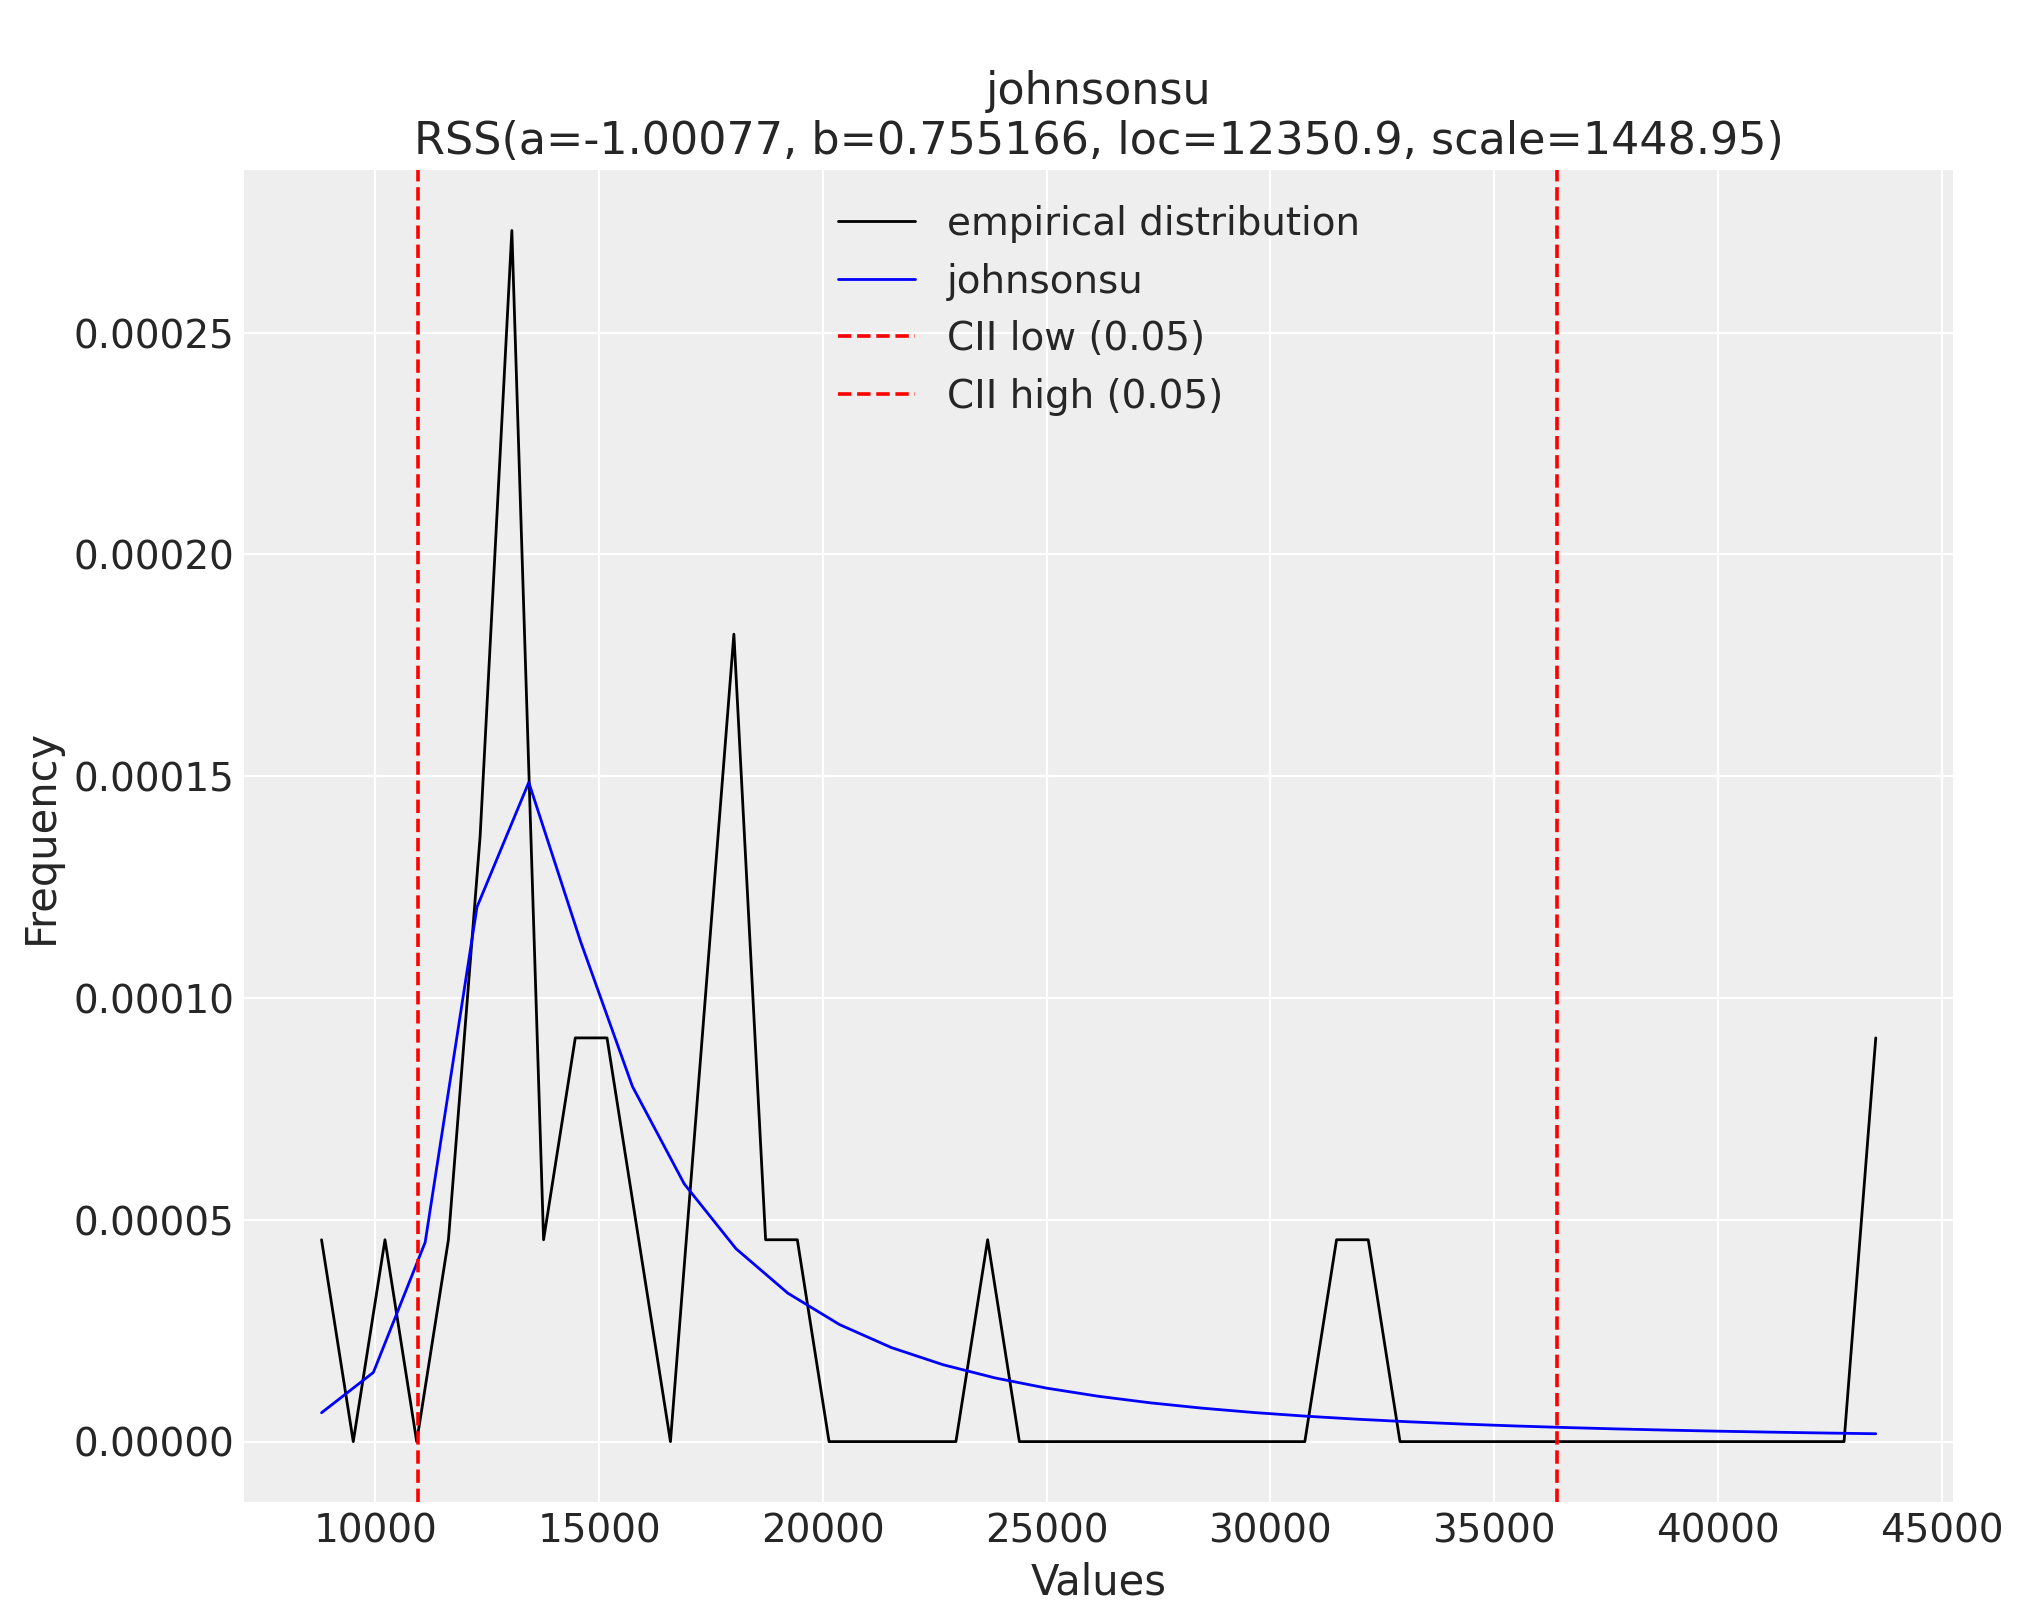

In [28]:
dist.plot()

In [29]:
dist = distfit(distr='full', smooth=7)
dist.fit_transform(ts_values)
dist.summary

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[alpha          ] [0.04 sec] [RSS: 3.60819e-09] [loc=525.401 scale=45428.343]
[distfit] >[anglit         ] [0.01 sec] [RSS: 9.75043e-09] [loc=15678.249 scale=10376.173]
[distfit] >[arcsine        ] [0.01 sec] [RSS: 6.27262e-08] [loc=6378.719 scale=37506.281]
[distfit] >[beta           ] [0.02 sec] [RSS: 5.73146e-08] [loc=6826.614 scale=37058.386]
[distfit] >[betaprime      ] [0.04 sec] [RSS: 8.23811e-09] [loc=-1.689 scale=130.834]
[distfit] >[bradford       ] [0.02 sec] [RSS: 3.57729e-08] [loc=8441.445 scale=35443.555]
[distfit] >[burr           ] [0.04 sec] [RSS: 4.14941e-09] [loc=-17.160 scale=1600.241]
[distfit] >[cauchy         ] [0.00 sec] [RSS: 7.83235e-09] [loc=14431.785 scale=2453.913]
[distfit] >[chi            ] [0.03 sec] [RSS: 2.60481e-08] [loc=8442.000 scale=12707.914]
[distfit] >[chi2           ] [0.03 sec] [RSS: 8.88403e-08] [loc=8442.000 scale=3.021]
[distfit] >[cosine         

,distr,score,LLE,loc,scale,arg
0,fisk,0.0,NaN,7354.894966,8063.479583,"(2.727397889119061,)"
1,alpha,0.0,NaN,525.401202,45428.343209,"(3.0372721788244426,)"
2,burr,0.0,NaN,-17.159686,1600.240876,"(3.481492789401594, 1901.8927994269206)"
3,invgamma,0.0,NaN,4877.564374,42591.747415,"(4.293561652544508,)"
4,exponnorm,0.0,NaN,10951.516614,1567.175446,"(4.441316249170599,)"
...,...,...,...,...,...,...
75,halfgennorm,0.0,NaN,8442.0,1.326813,"(0.19340856152209945,)"
76,vonmises,3245501697048272005446790176776097320649820576...,NaN,12280.356558,0.0,"(1.9225297914692359,)"
77,powerlognorm,inf,NaN,8402.937979,19.23373,"(0.002261023038092274, 0.20000812627560646)"
78,mielke,NaN,NaN,-15.302096,1673.660455,"(5659.489213137053, 3.4813339624066764)"


[distfit] >plot..


(<Figure size 1000x800 with 1 Axes>,
 <AxesSubplot: title={'center': '\nfisk\nRSS(c=2.7274, loc=7354.89, scale=8063.48)'}, xlabel='Values', ylabel='Frequency'>)

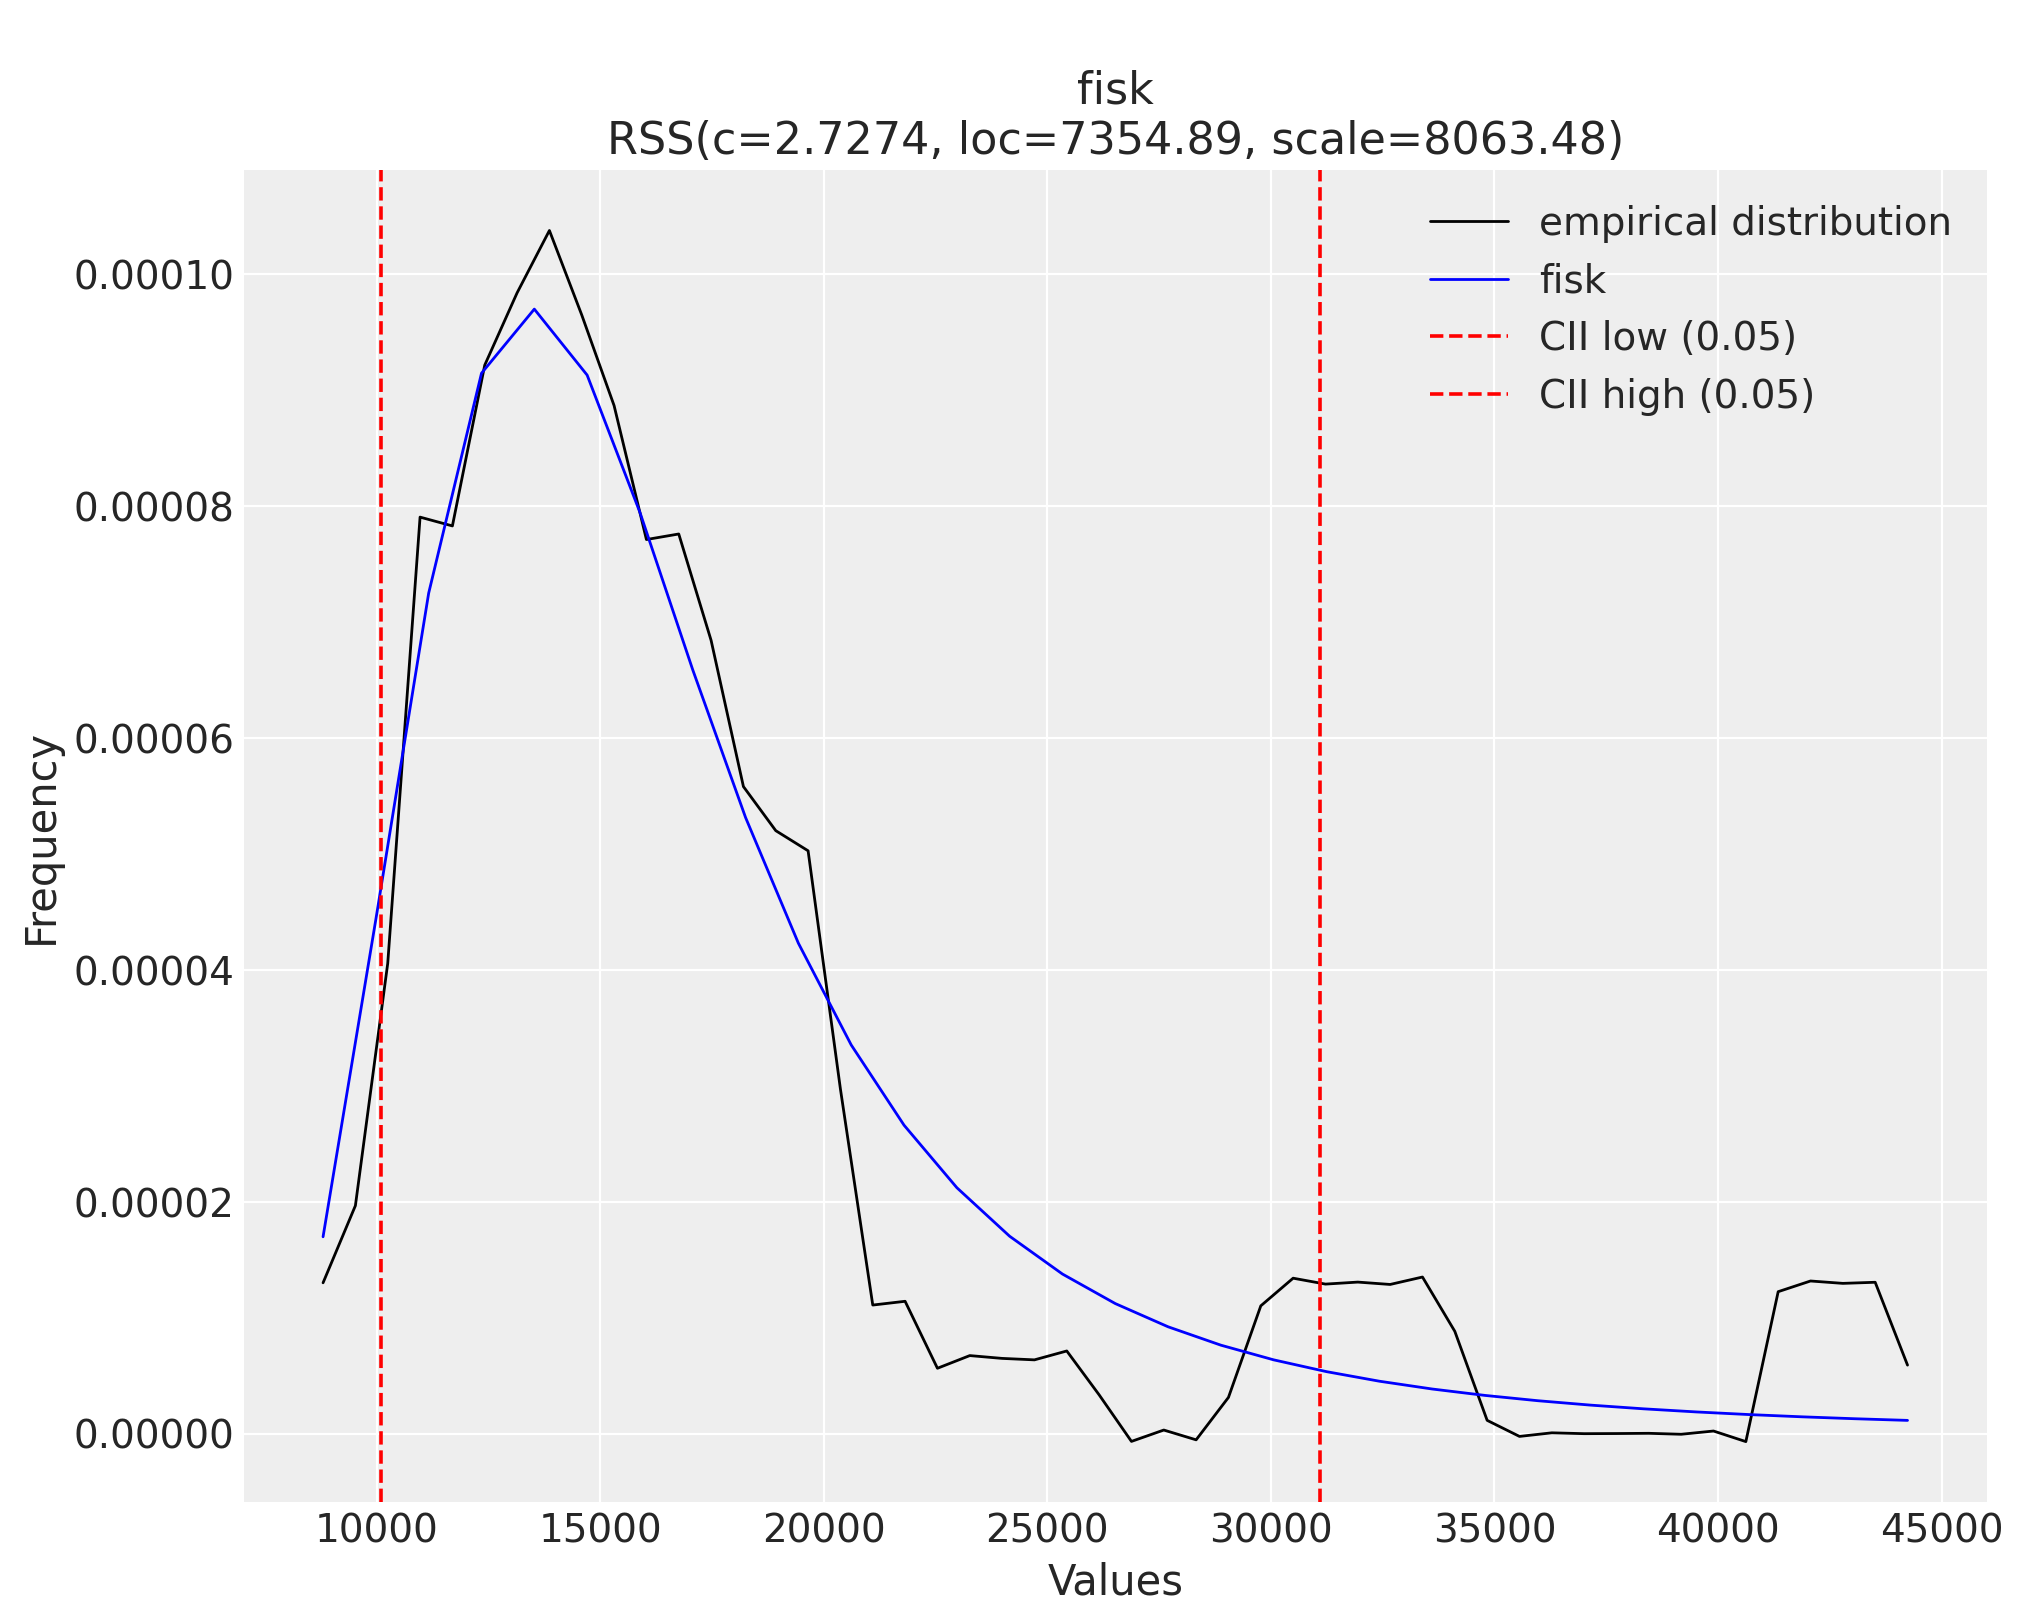

In [30]:
dist.plot()

# Bayesian Non IID

In [31]:
ts_values.mean()

17911.83870967742

In [33]:
ts_values.describe()['std']

8633.939688217943

In [37]:
SAMPLES = 50000
BURN = 10000
SEED=1991
model_sp = pm.Model()
with model_sp:

    # Priors for unknown model parameters
    #priors selling price
    mu = pm.Normal('mean', mu=18000, sd=8700)
    sd_ = pm.HalfNormal('sp_std', sd=8700)
    
    
    likelihood_selling_price = pm.Normal('ingresos_sim', mu=mu, sd=sd_, observed=ts_values)
    
    step = pm.Metropolis()
    trace_sp = pm.sample(SAMPLES, tune=BURN, step=step, random_seed=SEED, cores=1)


You can find the C code in this temporary file: C:\Users\JUANSA~1.GAR\AppData\Local\Temp\theano_compilation_error_nqw9uzf8


Exception: ("Compilation failed (return status=1): C:\\Users\\JUANSA~1.GAR\\AppData\\Local\\Temp\\ccZe8f6Y.o: In function `run':\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:99: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:124: undefined reference to `__imp_PyExc_ValueError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:130: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:158: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:195: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:210: undefined reference to `__imp_PyExc_ValueError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:479: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:\\Users\\JUANSA~1.GAR\\AppData\\Local\\Temp\\ccZe8f6Y.o: In function `_Py_INCREF':\r. C:/Users/juan.s.a.garcia/.conda/envs/bayes_env/include/object.h:408: undefined reference to `__imp__Py_NoneStruct'\r. C:\\Users\\JUANSA~1.GAR\\AppData\\Local\\Temp\\ccZe8f6Y.o: In function `run':\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:485: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:244: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:265: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:173: undefined reference to `__imp_PyExc_TypeError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:179: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:515: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:514: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:516: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:259: undefined reference to `__imp_PyExc_TypeError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:279: undefined reference to `__imp__Py_NoneStruct'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:294: undefined reference to `__imp_PyExc_ValueError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:328: undefined reference to `__imp_PyExc_NotImplementedError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:349: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:216: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:343: undefined reference to `__imp_PyExc_TypeError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:300: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:397: undefined reference to `__imp_PyExc_RuntimeError'\r. C:\\Users\\JUANSA~1.GAR\\AppData\\Local\\Temp\\ccZe8f6Y.o: In function `instantiate':\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:550: undefined reference to `__imp_PyExc_TypeError'\r. C:\\Users\\JUANSA~1.GAR\\AppData\\Local\\Temp\\ccZe8f6Y.o: In function `_import_array':\r. C:/Users/juan.s.a.garcia/.conda/envs/bayes_env/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1493: undefined reference to `__imp_PyCapsule_Type'\r. C:/Users/juan.s.a.garcia/.conda/envs/bayes_env/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1494: undefined reference to `__imp_PyExc_RuntimeError'\r. C:\\Users\\JUANSA~1.GAR\\AppData\\Local\\Temp\\ccZe8f6Y.o: In function `PyInit_m31975b6dadb59d49af3f2b36405378825884299512ee0ed9081be33fa591d30d':\r. C:/Users/juan.s.a.garcia/AppData/Local/Theano/compiledir_Windows-10-10.0.22000-SP0-Intel64_Family_6_Model_140_Stepping_1_GenuineIntel-3.9.11-64/tmpm8xlt07b/mod.cpp:583: undefined reference to `__imp_PyExc_ImportError'\r. C:\\Users\\JUANSA~1.GAR\\AppData\\Local\\Temp\\ccZe8f6Y.o: In function `_import_array':\r. C:/Users/juan.s.a.garcia/.conda/envs/bayes_env/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1525: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/juan.s.a.garcia/.conda/envs/bayes_env/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1509: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/juan.s.a.garcia/.conda/envs/bayes_env/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1515: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/juan.s.a.garcia/.conda/envs/bayes_env/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1537: undefined reference to `__imp_PyExc_RuntimeError'\r. C:/Users/juan.s.a.garcia/.conda/envs/bayes_env/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1489: undefined reference to `__imp_PyExc_AttributeError'\r. C:/Users/juan.s.a.garcia/.conda/envs/bayes_env/lib/site-packages/numpy/core/include/numpy/__multiarray_api.h:1501: undefined reference to `__imp_PyExc_RuntimeError'\r. collect2.exe: error: ld returned 1 exit status\r. ", 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{1.32117849..214163e-08}))')